In [1]:
#setup imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#files to Load
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

#Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)

#Use MERGE to combine the files on Mouse ID
drugs_df=pd.merge(mouse_df,clinical_df, on="Mouse ID")

#Test display
drugs_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
#use GROUPBY to associate the Mean Tumor Volume Data by Drug and Timepoint 
tumor_volume = drugs_df.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()

#setup DataFrame
tumor_volume_df = pd.DataFrame(data = tumor_volume)

#view new DataFrame
tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
#use GROUPBY and add the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = drugs_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()

#setup  DataFrame
sem_df = pd.DataFrame(data = sem)

#view new DataFrame
sem_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
#use LOC to findn the 4 selected drugs and the Tumor Volume.  Calculat the standard error oer each
errors1 = sem_df.loc[(sem_df["Drug"] == "Capomulin"), "Tumor Volume (mm3)"]
errors2 = sem_df.loc[(sem_df["Drug"] == "Infubinol"), "Tumor Volume (mm3)"]
errors3 = sem_df.loc[(sem_df["Drug"] == "Ketapril"), "Tumor Volume (mm3)"]
errors4 = sem_df.loc[(sem_df["Drug"] == "Placebo"), "Tumor Volume (mm3)"]

#test preview
errors1

0    0.000000
1    0.448593
2    0.702684
3    0.838617
4    0.909731
5    0.881642
6    0.934460
7    1.052241
8    1.223608
9    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [5]:
#reset the data frame format for display
tumor_formatted = tumor_volume_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

#view new formatting
tumor_formatted

#breakout the Timepoint column and realign the headers for the drugs
drug_details = tumor_formatted[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
new_drug_list = drug_details.reset_index()
new_drug_list

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


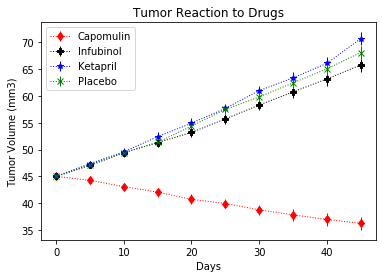

In [6]:
#prepare graph for Drugs and Tumore Reaction, set formatting
plt.errorbar(new_drug_list["Timepoint"],new_drug_list["Capomulin"], yerr=errors1, color="red", marker="d", linestyle=":", label="Capomulin", lw=1.0)
plt.errorbar(new_drug_list["Timepoint"],new_drug_list["Infubinol"], yerr=errors1, color="black", marker="P", linestyle=":", label="Infubinol", lw=1.0)
plt.errorbar(new_drug_list["Timepoint"],new_drug_list["Ketapril"], yerr=errors1, color="blue", marker="*", linestyle=":", label="Ketapril", lw=1.0)
plt.errorbar(new_drug_list["Timepoint"],new_drug_list["Placebo"], yerr=errors1, color="green", marker="x", linestyle=":", label="Placebo", lw=1.0)

#formatting
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Reaction to Drugs")
plt.legend(loc="best")


In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
#use GROUPBY to Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_df = drugs_df[["Drug", "Timepoint","Metastatic Sites"]]
#build DataFrame
meta_mean = metastatic_df[["Drug","Metastatic Sites"]].mean()
#reset index in DataFrame
meta_mean = meta_mean.reset_index()


In [8]:
#build new DataFrame with Standard Error associated to Met. Sites Grouped by Drug and Timepoint 
meta_error = metastatic_df.groupby(["Drug", "Timepoint"]).sem()

#view DataFrame
meta_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
#resert index to prepare for graph
meta_error = meta_error.reset_index()
meta_error

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [10]:
#create error values per drug for charting
meta_error1= meta_error.loc[(meta_error["Drug"] == "Capomulin"), "Metastatic Sites"]
meta_error2= meta_error.loc[(meta_error["Drug"] == "Infubinol"), "Metastatic Sites"]
meta_error3= meta_error.loc[(meta_error["Drug"] == "Ketapril"), "Metastatic Sites"]
meta_error4= meta_error.loc[(meta_error["Drug"] == "Placebo"), "Metastatic Sites"]
#test
meta_error1


0    0.000000
1    0.074833
2    0.125433
3    0.132048
4    0.161621
5    0.181818
6    0.172944
7    0.169496
8    0.175610
9    0.202591
Name: Metastatic Sites, dtype: float64

In [11]:
#format new Data Frame for graphing
new_meta_sites = pd.pivot_table(metastatic_df, index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
new_meta_sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
new_meta_sites = new_meta_sites.reset_index()

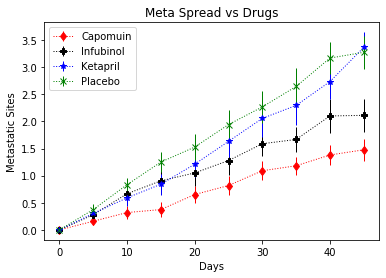

In [13]:
#prepare the graph and error bars
plt.errorbar(new_meta_sites["Timepoint"],new_meta_sites["Capomulin"], yerr=meta_error1,color="red", fmt="d", linestyle=":", label="Capomuin", lw=1.0)
plt.errorbar(new_meta_sites["Timepoint"],new_meta_sites["Infubinol"], yerr=meta_error2, color="black", fmt="P", linestyle=":", label="Infubinol", lw=1.0)
plt.errorbar(new_meta_sites["Timepoint"],new_meta_sites["Ketapril"], yerr=meta_error3, color="blue", fmt="*", linestyle=":", label="Ketapril", lw=1.0)
plt.errorbar(new_meta_sites["Timepoint"],new_meta_sites["Placebo"], yerr=meta_error4, color="green", fmt="x", linestyle=":", label="Placebo", lw=1.0)

#formatting
plt.xlabel("Days")
plt.ylabel("Metastatic Sites")
plt.title("Meta Spread vs Drugs")
plt.legend(loc="best")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
#build new DataFrame for Drug and Mouse assosiation 
test_mouse = drugs_df[["Drug", "Timepoint", "Mouse ID"]]    

#use GROUPBY to capture by drug and timepoint and count grouped mouses
mouse = test_mouse.groupby(["Drug", "Timepoint"]).count()

#reset the index for graph
mouse = mouse.reset_index()

#test
mouse.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
#prepare data for chart, set index and columns
survival_rate_df = pd.pivot_table(mouse, index = "Timepoint", columns = "Drug", values = "Mouse ID")

#view the DataFrame
survival_rate_df = survival_rate_df.reset_index()
survival_rate_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
#create calculation of survival rate of mouse vs drug applied
percentage_capomulin = (survival_rate_df["Capomulin"])/(survival_rate_df.loc[0,"Capomulin"])*100
percentage_infubinol = (survival_rate_df["Infubinol"])/(survival_rate_df.loc[0,"Infubinol"])*100
percentage_ketapril = (survival_rate_df["Ketapril"])/(survival_rate_df.loc[0,"Ketapril"])*100
percentage_placebo = (survival_rate_df["Placebo"])/(survival_rate_df.loc[0,"Placebo"])*100

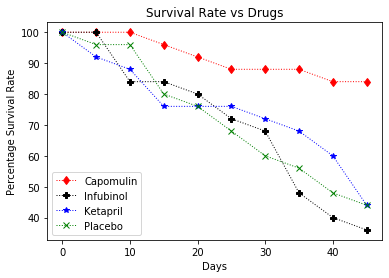

In [17]:
#prepare graph to show druggs and relation to timepoint
survive_graph = survival_rate_df[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]

#bring each drug percentage into the survive_graph df
survive_graph["Percentage for Capomulin"] = percentage_capomulin
survive_graph["Percentage for Infubinol"] = percentage_infubinol
survive_graph["Percentage for Ketapril"] = percentage_ketapril
survive_graph["Percentage for Placebo"]= percentage_placebo
survive_graph


#build graph and format
plt.plot(survive_graph["Timepoint"], survive_graph["Percentage for Capomulin"], color = "red", marker="d", linestyle=":", label="Capomulin", lw=1.0)
plt.plot(survive_graph["Timepoint"], survive_graph["Percentage for Infubinol"], color = "black", marker="P", linestyle=":", label="Infubinol", lw=1.0)
plt.plot(survive_graph["Timepoint"], survive_graph["Percentage for Ketapril"], color = "blue", marker="*", linestyle=":", label= "Ketapril", lw=1.0)
plt.plot(survive_graph["Timepoint"], survive_graph["Percentage for Placebo"], color = "green", marker="x", linestyle=":", label="Placebo", lw=1.0)


#formatting
plt.xlabel("Days")
plt.ylabel("Percentage Survival Rate")
plt.title("Survival Rate vs Drugs")
plt.legend(loc="best")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:


#bring in all drug data
drug_details

#create the calcualtion to compare the first vs the last use of the drug application for the percent change for each drug
#use LOC to find the specific values for the calculation
volume_change = (drug_details.loc[45, :] - drug_details.loc[0,:]) / drug_details.loc[0,:] *100
volume_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [19]:
#build new datafram with the percent change amounts
percent_change = pd.DataFrame({"Percentage": volume_change})
percent_df = percent_change.reset_index()
percent_df


,Drug,Percentage
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


Text(0.5, 1.0, 'Tumor Change Over 45 Days of Drugs')

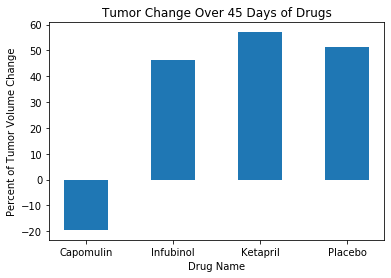

In [23]:
#build new graph to show Drugs, Time and Tumor
bars = plt.bar(percent_df["Drug"], percent_df["Percentage"], width=.5, align="center")


#formatting 
plt.ylabel("Percent of Tumor Volume Change")
plt.xlabel("Drug Name")
plt.title("Tumor Change Over 45 Days of Drugs")


![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
### Capomulin was the most effective drug used on teh tumors, in which it shrunk the tumor volume over the 45 day application period.
### The Capomulin also showed the best survival rate for the mouse, while the Infubinol and Ketapril yeild the same results and the placebo the worst survival rates.
### The Placebo actaully showing better progress in restrainng the meta tumor spread compared to the Ketapril and Infubinol
